In [3]:
# Importing the needed modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore', DeprecationWarning)
warnings.simplefilter('ignore', FutureWarning)

# To display plots inside the iPython Notebook itself
%matplotlib inline

In [4]:
# To verify how data is orgainzed in file(to find the delimiter) and then
# use corresponding function to open the file. eg
# data could be in .csv. .tsv, excel format etc.
pathOfDataFile = "data/HTRU_2.csv"
firstFewLines = list()
noOfLinesToView = 5

with open(pathOfDataFile) as dataFile:
    firstFewLines = [next(dataFile) for i in range(noOfLinesToView)]
    for line in firstFewLines:
        print(line)

140.5625,55.68378214,-0.234571412,-0.699648398,3.199832776,19.11042633,7.975531794,74.24222492,0

102.5078125,58.88243001,0.465318154,-0.515087909,1.677257525,14.86014572,10.57648674,127.3935796,0

103.015625,39.34164944,0.323328365,1.051164429,3.121237458,21.74466875,7.735822015,63.17190911,0

136.75,57.17844874,-0.068414638,-0.636238369,3.642976589,20.9592803,6.89649891,53.59366067,0

88.7265625,40.67222541,0.600866079,1.123491692,1.178929766,11.4687196,14.26957284,252.5673058,0



In [6]:
# Import the colon delimited data file into pandas dataFrame
pulsars_Df = pd.read_csv(pathOfDataFile, sep = ",", names= ["M1", "ST1", "EX1", "SK1", "M2", \
                                      "ST2", "EX2", "SK2", "Class"])

pulsars_Df.head(7)

,M1,ST1,EX1,SK1,M2,ST2,EX2,SK2,Class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0
5,93.570312,46.698114,0.531905,0.416721,1.636288,14.545074,10.621748,131.394004,0
6,119.484375,48.765059,0.031460,-0.112168,0.999164,9.279612,19.206230,479.756567,0


In [7]:
pulsars_Df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17898 entries, 0 to 17897
Data columns (total 9 columns):
M1       17898 non-null float64
ST1      17898 non-null float64
EX1      17898 non-null float64
SK1      17898 non-null float64
M2       17898 non-null float64
ST2      17898 non-null float64
EX2      17898 non-null float64
SK2      17898 non-null float64
Class    17898 non-null int64
dtypes: float64(8), int64(1)
memory usage: 1.2 MB


Data Types for columns are matching as specified in data description. Columns containing numeric data are represented as of type "float64" and column containing class variable, a categorical variable is encoded in type "int64", in which value "0" means "No" - "Star is Not a pulsar" and "1" means "Yes" - "Star is a pulsar"

dtypes: float64(8), int64(1)

Also, number of entries in all columns is same, signalling that either data contains no missing values or missing values have been already replaced with some specific values(eg -1,999 or mean/median of the series etc). Next we would try to uncover details on these missing values.

In [9]:
# To find any missing values
pulsars_Df.isnull().any()

M1       False
ST1      False
EX1      False
SK1      False
M2       False
ST2      False
EX2      False
SK2      False
Class    False
dtype: bool

**There are no missing values for any observations/rows in our data set.**

In [11]:
# To find duplicated rows in data Frame
pulsars_Df.duplicated().any()

False

**There are no duplicate values for any observations/rows in our data set.**

In [12]:
pulsars_Df.describe()

,M1,ST1,EX1,SK1,M2,ST2,EX2,SK2,Class
count,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000
mean,111.079968,46.549532,0.477857,1.770279,12.614400,26.326515,8.303556,104.857709,0.091574
std,25.652935,6.843189,1.064040,6.167913,29.472897,19.470572,4.506092,106.514540,0.288432
min,5.812500,24.772042,-1.876011,-1.791886,0.213211,7.370432,-3.139270,-1.976976,0.000000
25%,100.929688,42.376018,0.027098,-0.188572,1.923077,14.437332,5.781506,34.960504,0.000000
50%,115.078125,46.947479,0.223240,0.198710,2.801839,18.461316,8.433515,83.064556,0.000000
75%,127.085938,51.023202,0.473325,0.927783,5.464256,28.428104,10.702959,139.309331,0.000000
max,192.617188,98.778911,8.069522,68.101622,223.392140,110.642211,34.539844,1191.000837,1.000000


#### Outlier Analysis

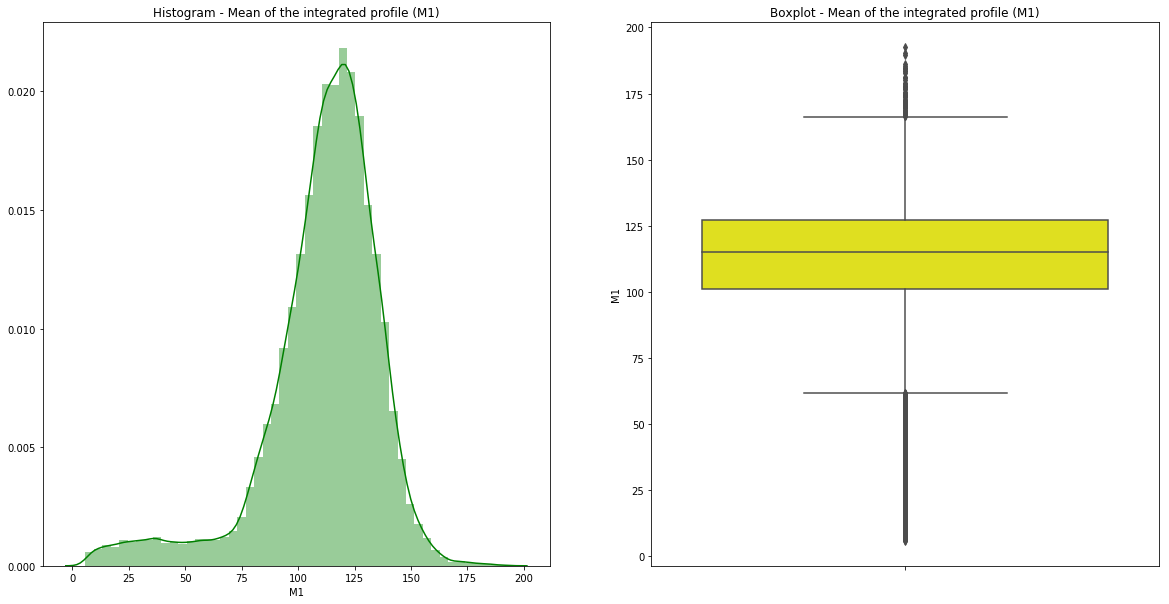

In [50]:
sns.set_palette("Set2")
fig, axes = plt.subplots(1,2,figsize = (20,10))
axes[0].set_title("Histogram - Mean of the integrated profile (M1)")
sns.distplot(pulsars_Df['M1'],kde=True, ax=axes[0],color="green")
axes[1].set_title("Boxplot - Mean of the integrated profile (M1)")
sns.boxplot(x = 'M1', ax=axes[1], orient='v', data=pulsars_Df, color="yellow")
plt.show()

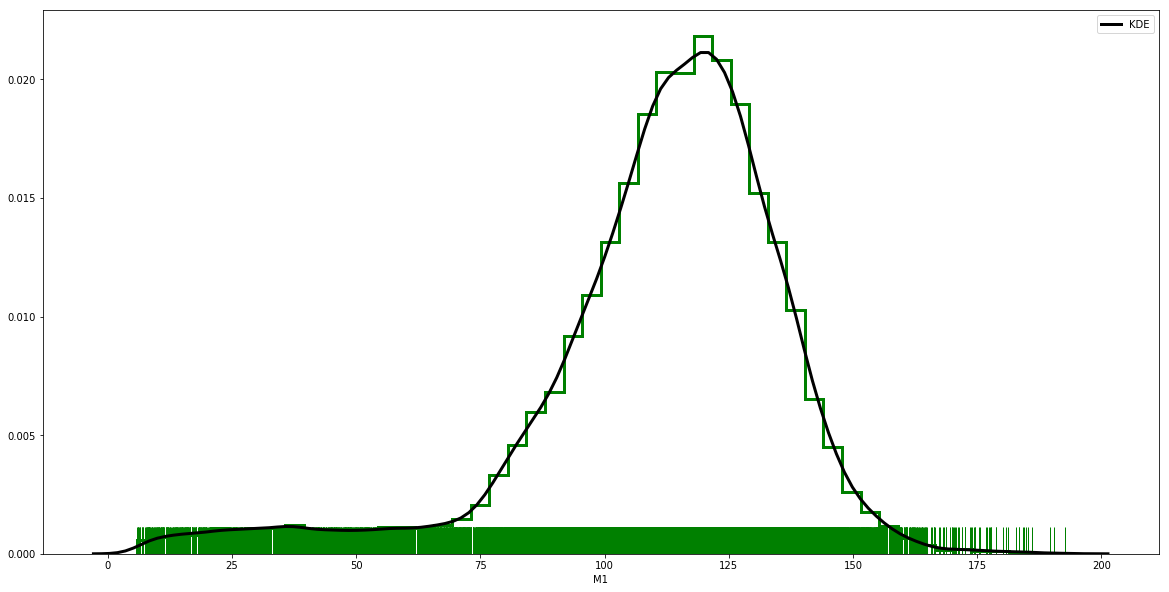

In [65]:
fig, axes = plt.subplots(1,1,figsize = (20,10))
axes = sns.distplot(pulsars_Df['M1'],rug=True, rug_kws={"color": "g"},
                   kde_kws={"color": "k", "lw": 3, "label": "KDE"},
                   hist_kws={"histtype": "step", "linewidth": 3,
                            "alpha": 1, "color": "g"})
plt.show()


In [67]:
# Check how many values of M1 variable are over or below 3 std deviations
a = np.mean(pulsars_Df['M1']) - (3 * np.std(pulsars_Df['M1']))
b = np.mean(pulsars_Df['M1']) + (3 * np.std(pulsars_Df['M1']))
print("Number of values under 3 Std. = %s" %pulsars_Df[pulsars_Df['M1'] < a]['Class'].count())
print("Number of values above 3 Std. = %s" %pulsars_Df[pulsars_Df['M1'] > b]['Class'].count())

Number of values under 3 Std. = 451
Number of values above 3 Std. = 3


In [83]:
c = pulsars_Df[pulsars_Df['M1'] < a]['Class'].count()
d = sum(pulsars_Df[pulsars_Df['M1'] < a]['Class'])
print("Percentage of values of Class 0 under 3 Std. of M1 Variable = %s" %((c - d)/c))
print("Percentage of values of Class 1 under 3 Std. of M1 Variable = %s" %((d)/c))

Percentage of values of Class 0 under 3 Std. of M1 Variable = 0.008869179600886918
Percentage of values of Class 1 under 3 Std. of M1 Variable = 0.991130820399113


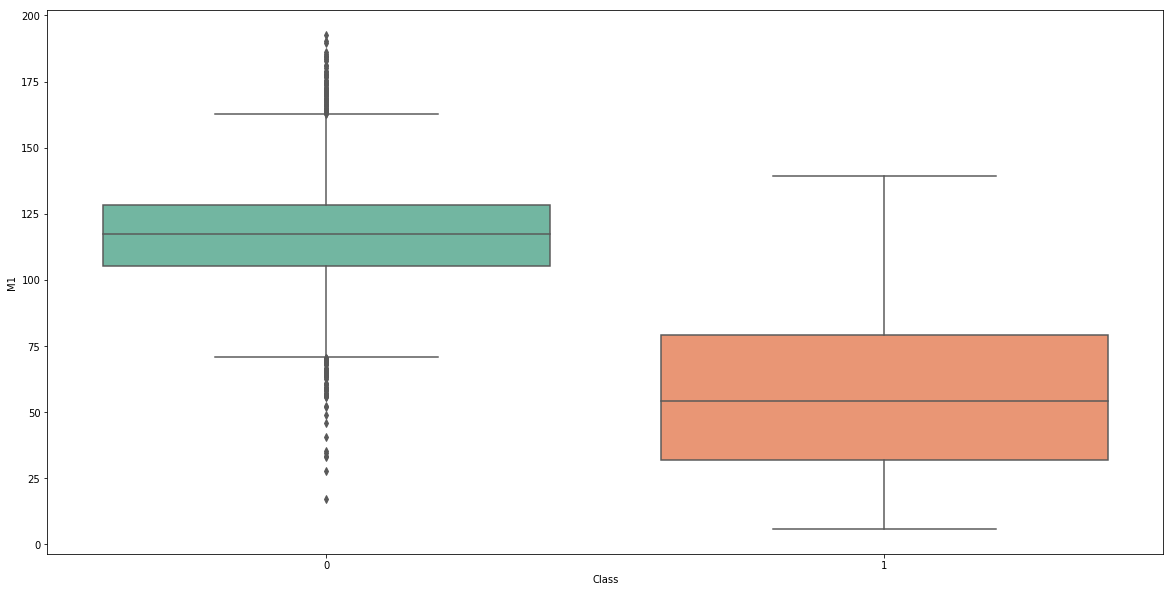

In [71]:
fig, axes = plt.subplots(1,1,figsize = (20,10))
axes = sns.boxplot(x = 'Class', y = 'M1', data=pulsars_Df)
plt.show()

In [84]:
# Values of M1 variable over 3 std of mean
pulsars_Df[pulsars_Df['M1'] > b]

,M1,ST1,EX1,SK1,M2,ST2,EX2,SK2,Class
4548,190.421875,59.106447,-1.517159,1.497580,95.719900,97.754509,0.058366,-1.964998,0
6564,189.734375,59.578268,-1.641515,1.868564,147.019231,76.999786,-0.898056,-0.649195,0
15687,192.617188,56.926093,-1.876011,2.444698,20.024247,53.103249,2.764809,6.341108,0


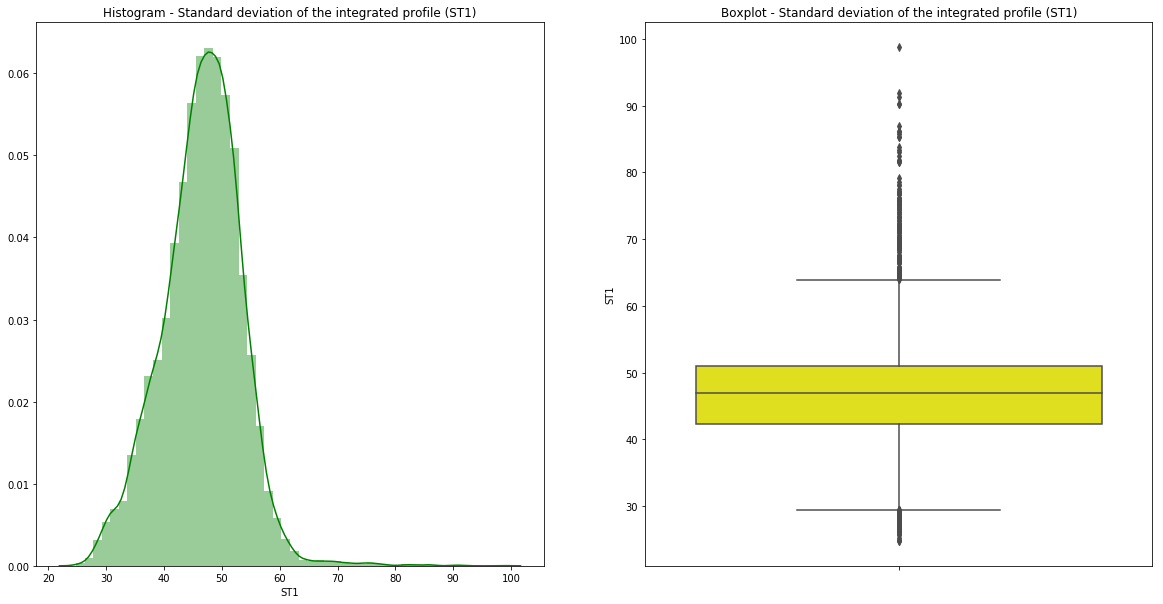

In [88]:
sns.set_palette("Set2")
fig, axes = plt.subplots(1,2,figsize = (20,10))
axes[0].set_title("Histogram - Standard deviation of the integrated profile (ST1)")
sns.distplot(pulsars_Df['ST1'],kde=True, ax=axes[0],color="green")
axes[1].set_title("Boxplot - Standard deviation of the integrated profile (ST1)")
sns.boxplot(x = 'ST1', ax=axes[1], orient='v', data=pulsars_Df, color="yellow")
plt.show()

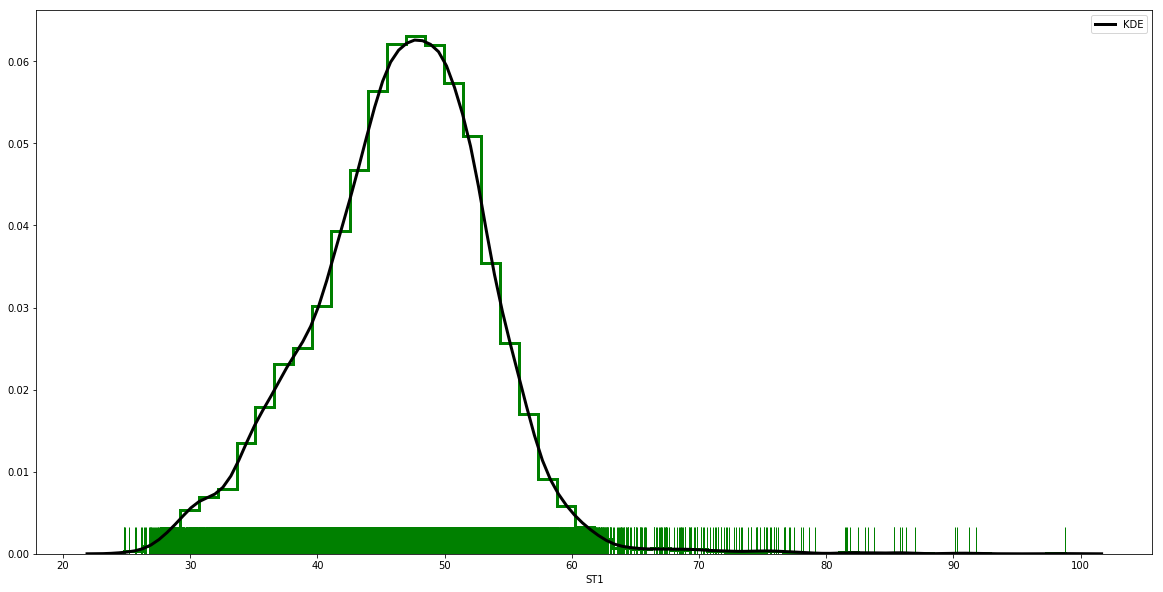

In [97]:
fig, axes = plt.subplots(1,1,figsize = (20,10))
axes = sns.distplot(pulsars_Df['ST1'],rug=True, rug_kws={"color": "g"},
                   kde_kws={"color": "k", "lw": 3, "label": "KDE"},
                   hist_kws={"histtype": "step", "linewidth": 3,
                            "alpha": 1, "color": "g"})
plt.show()


In [90]:
# Check how many values of ST1 variable are over or below 3 std deviations
a = np.mean(pulsars_Df['ST1']) - (3 * np.std(pulsars_Df['ST1']))
b = np.mean(pulsars_Df['ST1']) + (3 * np.std(pulsars_Df['ST1']))
print("Number of values under 3 Std. = %s" %pulsars_Df[pulsars_Df['ST1'] < a]['Class'].count())
print("Number of values above 3 Std. = %s" %pulsars_Df[pulsars_Df['ST1'] > b]['Class'].count())

Number of values under 3 Std. = 6
Number of values above 3 Std. = 99


In [95]:
pulsars_Df[pulsars_Df['ST1'] > b]

,M1,ST1,EX1,SK1,M2,ST2,EX2,SK2,Class
370,107.539062,86.951396,-0.008928,-1.676724,211.948997,54.010310,-2.556795,5.768458,0
525,119.367188,71.516046,0.061737,-1.383625,0.886288,9.267690,19.865582,493.538840,0
544,120.539062,71.487313,0.066583,-1.237876,1.568562,15.701101,11.669448,146.713841,0
758,59.351562,76.784458,1.536309,0.736696,0.636288,10.566986,21.017232,466.135457,0
893,136.828125,67.336504,-0.257778,-1.276375,0.962375,8.426909,23.742638,691.196174,0
961,162.039062,67.439371,-0.911776,-0.229593,0.807692,10.852915,21.274814,483.251270,0
1124,118.984375,77.139786,0.173310,-1.501641,0.836957,11.997185,17.941527,340.366461,0
1233,144.945312,70.872388,-0.359561,-1.011004,7.689799,37.922381,5.006665,24.171402,0
1235,130.406250,72.400949,-0.020930,-1.267204,5.086957,27.146896,6.109138,38.936796,0
1236,74.632812,75.867161,0.834880,-0.838742,67.623746,81.199889,0.998825,-0.311267,0


In [ ]:

sns.distplot(pulsars_Df['EX1'],kde=True, ax=axes[1,0])
sns.distplot(pulsars_Df['SK1'],kde=True, ax=axes[1,1])
sns.distplot(pulsars_Df['M2'],kde=True, ax=axes[2,0])
sns.distplot(pulsars_Df['ST2'],kde=True, ax=axes[2,1])
sns.distplot(pulsars_Df['EX2'],kde=True, ax=axes[3,0])
sns.distplot(pulsars_Df['SK2'],kde=True, ax=axes[3,1])

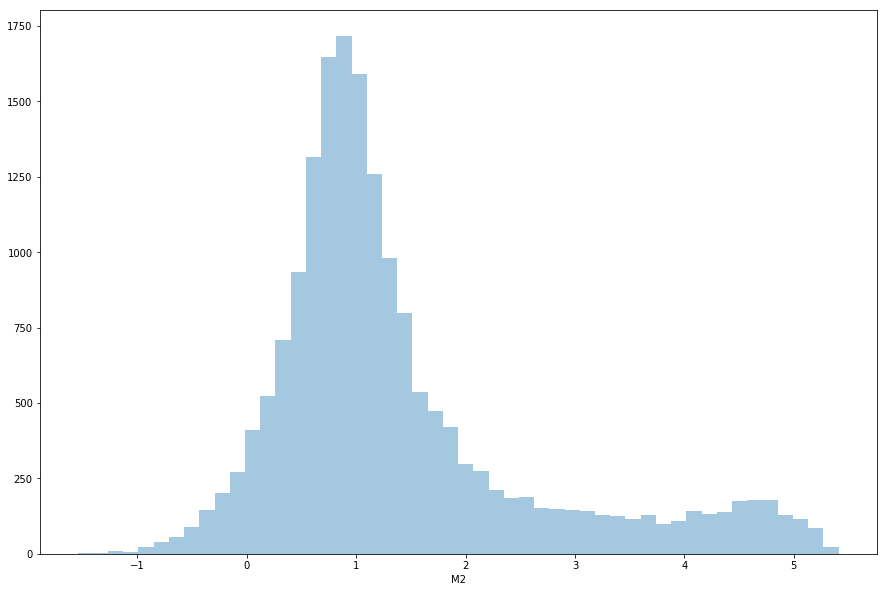

In [20]:
fig, axes = plt.subplots(1,1,figsize = (15,10))
sns.distplot(np.log(pulsars_Df['M2']),kde=False, ax=axes)
plt.show()

### Defined Functions

In [2]:
# Function to plot a correlation map
def plot_correlation_map( df ):
    corr = df.corr()
    _ , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    _ = sns.heatmap(
        corr, 
        cmap = cmap,
        square=True, 
        cbar_kws={ 'shrink' : .9 }, 
        ax=ax, 
        annot = True, 
        annot_kws = { 'fontsize' : 12 }
    )

In [3]:
# Reading data 
data = [
    pd.read_csv("data/HTRU_2.csv", names= ["M1", "ST1", "EX1", "SK1", "M2", 
                                      "ST2", "EX2", "SK2", "Class"])
]

#put into data frame
pulsar = pd.concat(data, ignore_index=True) 

#check out the data
pulsar.head(2) 

,M1,ST1,EX1,SK1,M2,ST2,EX2,SK2,Class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0


### Column Headers
- **M1** - Mean of the integrated profile.
- **ST1** - Standard deviation of the integrated profile. 
- **EX1** - Excess kurtosis of the integrated profile. 
- **SK1** - Skewness of the integrated profile. 
- **M2** - Mean of the DM-SNR curve.                               
- **ST2** - Standard deviation of the DM-SNR curve. 
- **EX2** - Excess kurtosis of the DM-SNR curve. 
- **SK2** - Skewness of the DM-SNR curve. 
- **Class** - Class

In [4]:
#check the shape of the data frame
pulsar.shape

(17898, 9)

In [5]:
#look for nulls
pulsar.isnull().any()

M1       False
ST1      False
EX1      False
SK1      False
M2       False
ST2      False
EX2      False
SK2      False
Class    False
dtype: bool

In [6]:
cols = list(pulsar.columns)
features = cols
features.remove('Class')

X = pulsar[features]
Y = pulsar['Class']

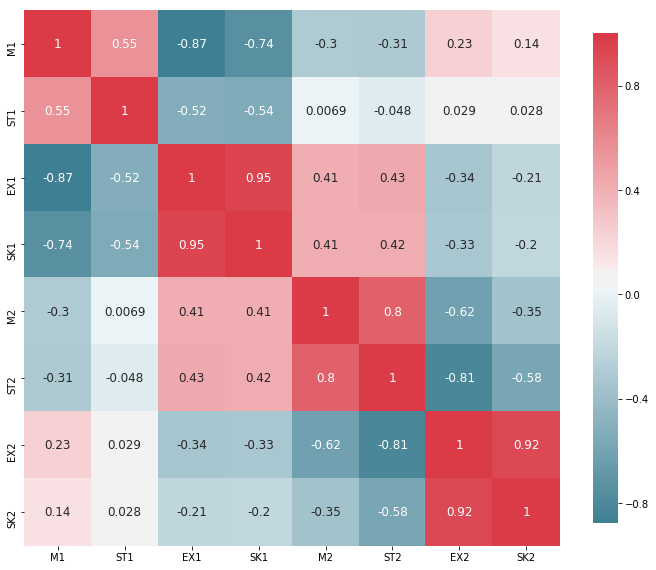

In [7]:
plot_correlation_map(X)